In [1]:
import numpy as np
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, Input
from keras import backend as K
K.set_image_dim_ordering('th')
import os
os.chdir("/home/ubuntu/data/")
import time
import matplotlib.pyplot as plt

from IPython.display import Image, display, clear_output
import datetime

Using TensorFlow backend.


In [2]:
# path to the model weights files.
weights_path = '../vgg16_weights_tf_dim_ordering_tf_kernels.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'train'
validation_data_dir = 'validation'
test_dir = 'test'
nb_train_samples = 800
nb_validation_samples = 370
epochs = 
batch_size = 5

input_tensor = Input(shape=(3,img_width,img_height))
base_model = applications.VGG16(weights='imagenet',include_top= False,input_tensor=input_tensor)
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))
top_model.load_weights(top_model_weights_path)
model = Model(inputs= base_model.input, outputs= top_model(base_model.output))

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:15]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=180,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

/usr/local/lib/python3.5/dist-packages/keras/applications/vgg16.py:182: UserWarning: You are using the TensorFlow backend, yet you are using the Theano image data format convention (`image_data_format="channels_first"`). For best performance, set `image_data_format="channels_last"` in your Keras config at ~/.keras/keras.json.
  warnings.warn('You are using the TensorFlow backend, yet you '


Found 841 images belonging to 2 classes.
Found 373 images belonging to 2 classes.


In [3]:
# fine-tune the model
time_start = time.time()
model_history = model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)
time_end = time.time()
print(int(time_end - time_start))

model.save_weights('last_and_finetuned_15fixed.h5')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=160, validation_steps=370, epochs=2)`
  


Epoch 1/2
160/160 [==============================] - 76s - loss: 0.4812 - acc: 0.8225 - val_loss: 0.7478 - val_acc: 0.6254
Epoch 2/2
160/160 [==============================] - 73s - loss: 0.4386 - acc: 0.8312 - val_loss: 0.6732 - val_acc: 0.6245
149


In [4]:
model_history.history.keys()

dict_keys(['val_acc', 'val_loss', 'acc', 'loss'])

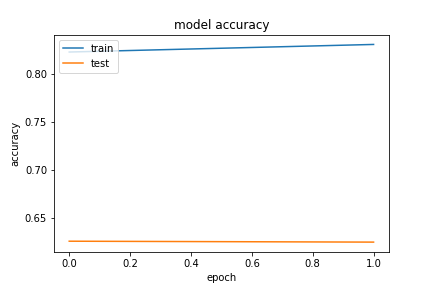

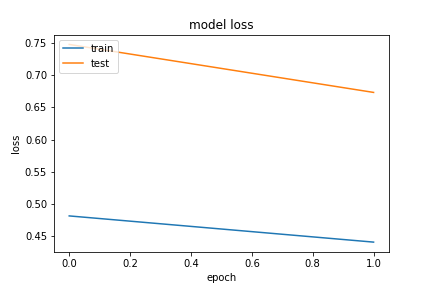

In [5]:
def plot_nicely(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    time_now = datetime.datetime.now()
    time_string = str(time_now.hour) + str(time_now.minute)
    fileName1 = "2_finetune_" + time_string + "_1.png"
    fileName2 = "2_finetune_" + time_string + "_2.png"
    
    plt.savefig(fileName1)
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(fileName2)
    plt.show()
    
    clear_output(True)
    display(Image(filename=fileName1))
    display(Image(filename=fileName2))
    return
    
plot_nicely(model_history)

In [6]:
files_benign=os.listdir(test_dir+"/Benign/")
files_malignant=os.listdir(test_dir+"/Malignant/")

In [7]:
def predict_image_class(file):
    #load the VGG16 model
    #model = applications.VGG16(include_top=False, weights='imagenet')
    #load the picture
    x = image.load_img(file, target_size=(img_width,img_height))
    x = image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    print(x.shape)
    # process the picture through the first network this will be used as input
    #for the top model
    #array = model.predict(x)
    #build the top model
    #model = Sequential()
    #model.add(Flatten(input_shape=array.shape[1:]))
    #model.add(Dense(256, activation='relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(1, activation='sigmoid'))
    # and use the weigths trained before
    #model.load_weights(top_model_weights_path)
    class_predicted = model.predict(x)
    print(class_predicted)
    if class_predicted==1:
        print("malign") # dog
    else:
        print("benign") # cat
        
from keras.preprocessing import image

print(test_dir + "/Benign/" + files_benign[0])
predict_image_class(test_dir + "/Benign/" + files_benign[0])

test/Benign/ISIC_0010371.jpg
(1, 3, 150, 150)
[[  4.61131515e-11]]
benign


In [8]:
predict_image_class("IMG_0845c1.JPG")

(1, 3, 150, 150)
[[  2.48712186e-28]]
benign
